In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('processed csv/marchtee_tshirt_info.csv')
df.head()

,Title,Color,MRP,SP,Discount
0,Classic Crew,Midnight Navy,1800.0,1500.0,16.7
1,Classic Crew,Deep Olive,1800.0,1500.0,16.7
2,Classic Crew,Classic Black,1800.0,1500.0,16.7
3,Classic Crew,Heather Grey,2300.0,1800.0,21.7
4,Classic Crew,Biscuit,1800.0,1500.0,16.7


In [25]:
df.describe()

,MRP,SP,Discount
count,13.000000,24.000000,24.000000
mean,2776.923077,2303.750000,9.991667
std,1590.677972,1306.667891,10.076573
min,1800.000000,1290.000000,0.000000
25%,1800.000000,1500.000000,0.000000
50%,1800.000000,1800.000000,11.250000
75%,2300.000000,1925.000000,16.700000
max,5900.000000,5000.000000,28.300000


In [26]:
for i in df['Title'].unique():
    print(i)

Classic Crew
Supima Polo
Classic V
Classic Suvin
Suvin V


In [27]:
def categorize_tshirt(name):
    categories = []

    if 'Classic Crew' in name:
        categories.append('Crewneck')
    if 'Supima Polo' in name:
        categories.append('Polo')
    if 'Classic V' in name:
        categories.append('V neck')
    if 'Classic Suvin' in name:
        categories.append('Crewneck premium')
    if 'Suvin V' in name:
        categories.append('V neck premium')    

    return ', '.join(sorted(set(categories)))

# Apply the categorization function to each T-shirt name
df['Category'] = df['Title'].apply(categorize_tshirt)

In [28]:
df = df[df['Color'] != 'Core Pack']
df = df[df['Color'] != 'Pack of 3 Core']
df.head(40)

,Title,Color,MRP,SP,Discount,Category
0,Classic Crew,Midnight Navy,1800.0,1500.0,16.7,Crewneck
1,Classic Crew,Deep Olive,1800.0,1500.0,16.7,Crewneck
2,Classic Crew,Classic Black,1800.0,1500.0,16.7,Crewneck
3,Classic Crew,Heather Grey,2300.0,1800.0,21.7,Crewneck
4,Classic Crew,Biscuit,1800.0,1500.0,16.7,Crewneck
5,Classic Crew,Theory Olive,1800.0,1500.0,16.7,Crewneck
6,Classic Crew,Denim Blue,2300.0,1800.0,21.7,Crewneck
7,Classic Crew,Sky Blue,1800.0,1500.0,16.7,Crewneck
9,Supima Polo,Midnight Navy,NaN,1800.0,0.0,Polo
10,Supima Polo,Classic Black,NaN,1800.0,0.0,Polo


Categories

In [29]:
for i in df['Category'].unique():
    print(i)

Crewneck
Polo
V neck
Crewneck premium
V neck premium


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     21 non-null     object 
 1   Color     21 non-null     object 
 2   MRP       10 non-null     float64
 3   SP        21 non-null     float64
 4   Discount  21 non-null     float64
 5   Category  21 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.1+ KB


In [31]:

cols = ['MRP', 'SP','Discount']

# Initialize an empty list to store category statistics
category_stats = []

# Compute mean, min, and max for each category and each column
for i in df['Category'].unique():
    cat = df[df['Category'] == i]
    stats = {
        'Category': i,
        'MRP_min': cat['MRP'].min(),
        'MRP_max': cat['MRP'].max(),
        'SP_min': cat['SP'].min(),
        'SP_max': cat['SP'].max(),
        'Discount_avg': cat['Discount'].mean(),
    }
    category_stats.append(stats)

# Convert the list of dictionaries to a DataFrame
category_stats_df = pd.DataFrame(category_stats)
category_stats_df


,Category,MRP_min,MRP_max,SP_min,SP_max,Discount_avg
0,Crewneck,1800.0,2300.0,1500.0,2300.0,15.955556
1,Polo,1800.0,1800.0,1290.0,1800.0,4.716667
2,V neck,2300.0,2300.0,1500.0,1800.0,5.425000
3,Crewneck premium,NaN,NaN,4900.0,4900.0,0.000000
4,V neck premium,NaN,NaN,4900.0,4900.0,0.000000


<Figure size 1400x1000 with 0 Axes>

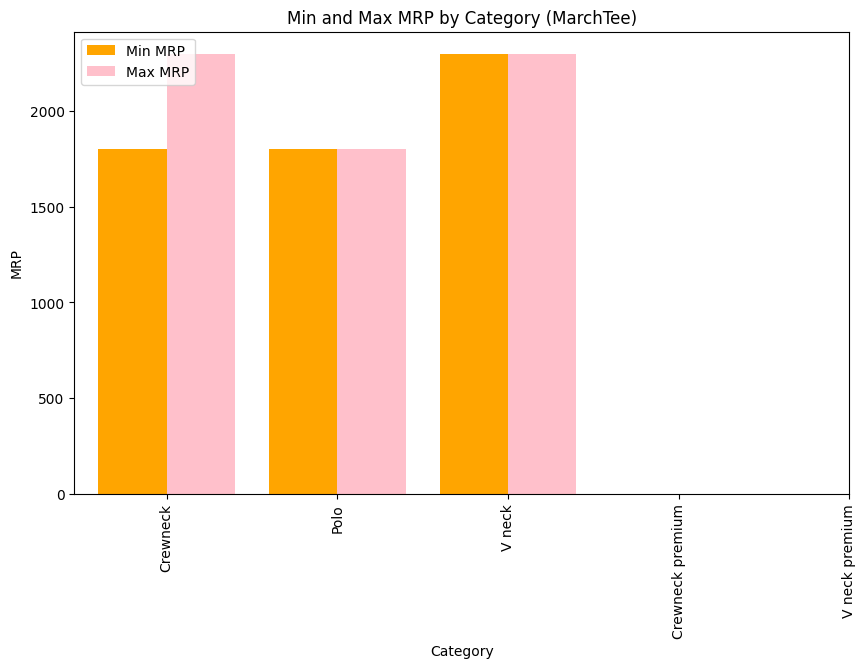

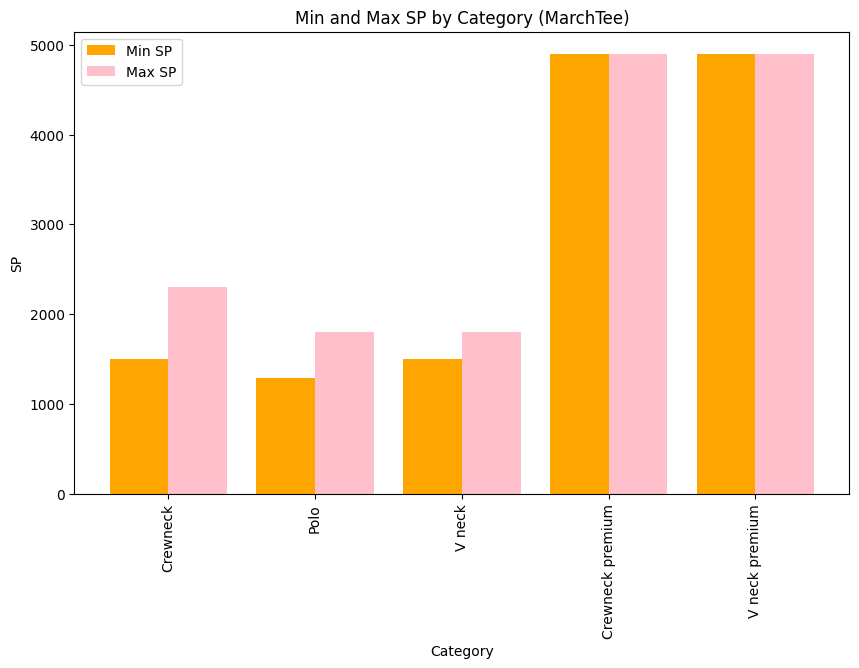

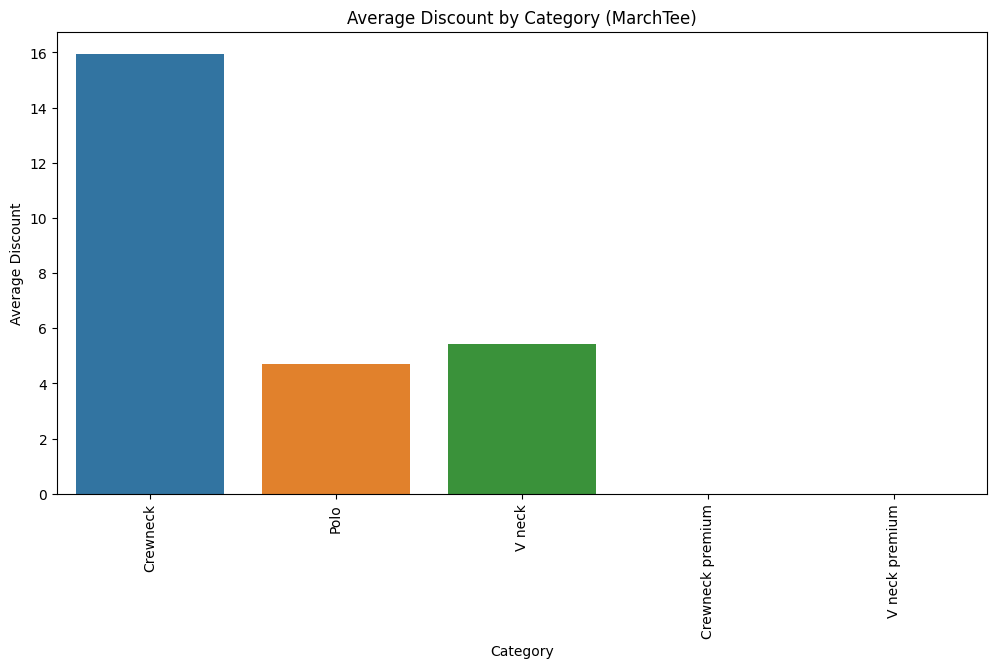

In [32]:
# Plot min and max MRP and SP
plt.figure(figsize=(14, 10))

# MRP
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(category_stats_df))

plt.bar(index, category_stats_df['MRP_min'], bar_width, color='orange', label='Min MRP')
plt.bar(index + bar_width, category_stats_df['MRP_max'], bar_width, color='pink', label='Max MRP')

plt.xlabel('Category')
plt.ylabel('MRP')
plt.title('Min and Max MRP by Category (MarchTee)')
plt.xticks(index + bar_width / 2, category_stats_df['Category'], rotation=90)
plt.legend()
plt.show()

# SP
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(category_stats_df))

plt.bar(index, category_stats_df['SP_min'], bar_width, color='orange', label='Min SP')
plt.bar(index + bar_width, category_stats_df['SP_max'], bar_width, color='pink', label='Max SP')

plt.xlabel('Category')
plt.ylabel('SP')
plt.title('Min and Max SP by Category (MarchTee)')
plt.xticks(index + bar_width / 2, category_stats_df['Category'], rotation=90)
plt.legend()
plt.show()


# Plot average discount for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Discount_avg', data=category_stats_df)
plt.xticks(rotation=90)
plt.ylabel('Average Discount')
plt.title('Average Discount by Category (MarchTee)')
plt.show()

# # Plot average rating for each category
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Category', y='Rating_avg', data=category_stats_df)
# plt.ylim(4.4,4.6)
# plt.xticks(rotation=90)
# plt.ylabel('Average Rating')
# plt.title('Average Rating by Category')
# plt.show()



In [33]:
category_stats_df

,Category,MRP_min,MRP_max,SP_min,SP_max,Discount_avg
0,Crewneck,1800.0,2300.0,1500.0,2300.0,15.955556
1,Polo,1800.0,1800.0,1290.0,1800.0,4.716667
2,V neck,2300.0,2300.0,1500.0,1800.0,5.425000
3,Crewneck premium,NaN,NaN,4900.0,4900.0,0.000000
4,V neck premium,NaN,NaN,4900.0,4900.0,0.000000


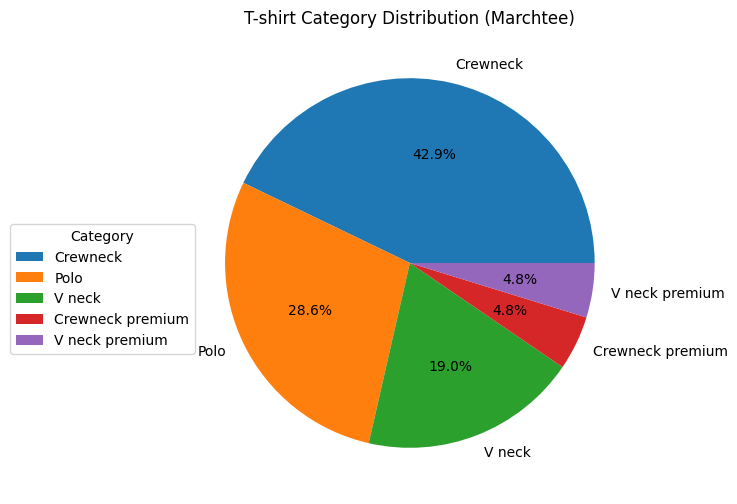

In [34]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(16, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('T-shirt Category Distribution (Marchtee)')
plt.legend(loc='upper right', bbox_to_anchor=(0.05, 0.6),title="Category")
plt.show()


# Reviews analysis

In [35]:
df1=pd.read_csv('processed csv/marchtee_reviews.csv')
df1.head()

,Name,Review
0,Yash Vardhan,Awesome shirts with top notch branding and cus...
1,@pradyotghate,I ordered a Black March Tee. Loved it so much ...
2,Gourav,"It was evident that a lot of care, love and pa..."
3,Yashwanth Ram,I love your Tees and have purchased 6 of them....
4,Jivesh Goenka,Re-ordered the blue one. Thanks so much. Kick-...


In [36]:
# Positive words and phrases
positive_words = [
    "comfortable", "awesome", "top notch", "loved", "care", "love", "passion", 
    "great", "perfect", "kick-ass", "loyalty", "craft", "dream", "amazing", 
    "pleasant", "quick", "fire", "fine craftsmanship", "impressive", "hats off", 
    "high quality", "laid back", "relaxed", "unbelievable", "good job", 
    "wonderful", "beautiful", "soft", "comfy", "ticks all boxes", "spoiled", 
    "fab", "worth every penny"
]

# Neutral words and phrases
neutral_words = [
    "fit", "material", "size", "fabric", "stitching", "color", "design", 
    "order", "packaging", "delivery", "price", "brand", "unboxing", "work", 
    "day", "purchased", "hands on", "picked up", "traveling", "home", "tee"
]

# Negative words and phrases
negative_words = ['too costly','bad', 'worse','worst','pathetic','not upto mark','costly','overpriced']  


In [37]:
def categorize_review(review):
    positive_count = sum(word in review for word in positive_words)
    negative_count = sum(word in review for word in negative_words)
    neutral_count = sum(word in review for word in neutral_words)
    
    if positive_count > max(negative_count, neutral_count):
        return "positive"
    elif negative_count > max(positive_count, neutral_count):
        return "negative"
    else:
        return "neutral"

# Apply the function to the DataFrame
df1['sentiment'] = df1['Review'].apply(categorize_review)

# Show the DataFrame with the new sentiment column
df1.head()

,Name,Review,sentiment
0,Yash Vardhan,Awesome shirts with top notch branding and cus...,neutral
1,@pradyotghate,I ordered a Black March Tee. Loved it so much ...,neutral
2,Gourav,"It was evident that a lot of care, love and pa...",neutral
3,Yashwanth Ram,I love your Tees and have purchased 6 of them....,neutral
4,Jivesh Goenka,Re-ordered the blue one. Thanks so much. Kick-...,neutral


In [38]:
category_counts = df1['sentiment'].value_counts()
print(category_counts)

sentiment
neutral     19
positive    11
negative     1
Name: count, dtype: int64


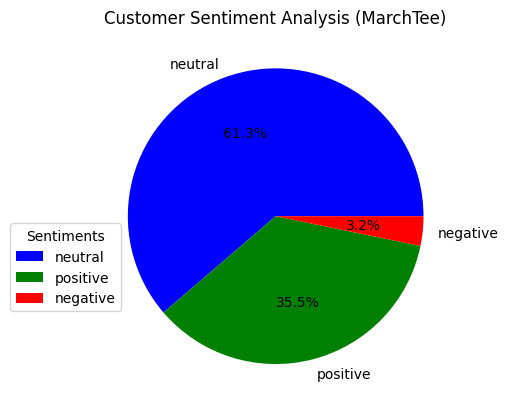

In [39]:
lab=['neutral','positive','negative']
colors = ['blue', 'green', 'red']  # Specify colors for the labels

# Create the pie chart
plt.pie(category_counts, labels=lab, autopct='%1.1f%%', colors=colors)
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.5),title="Sentiments")
plt.title("Customer Sentiment Analysis (MarchTee)")
plt.show()

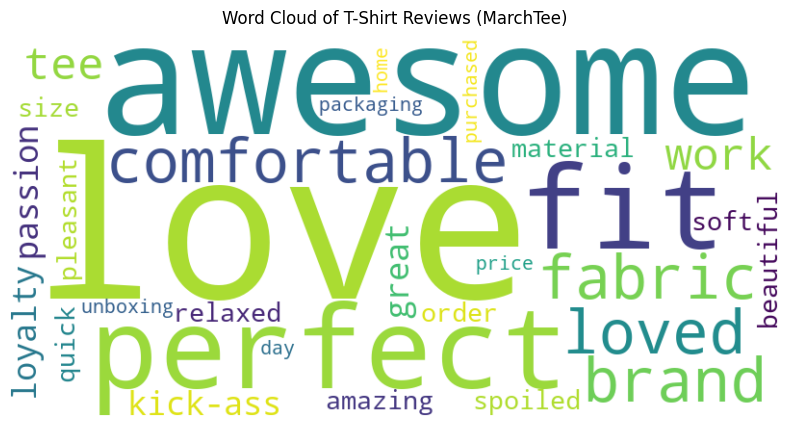

In [41]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame creation
# Assuming df_reviews is already created and contains a column 'review_text'

# Positive words and phrases
positive_words = [
    "comfortable", "awesome", "top notch", "loved", "care", "love", "passion", 
    "great", "perfect", "kick-ass", "loyalty", "craft", "dream", "amazing", 
    "pleasant", "quick", "fire", "fine craftsmanship", "impressive", "hats off", 
    "high quality", "laid back", "relaxed", "unbelievable", "good job", 
    "wonderful", "beautiful", "soft", "comfy", "ticks all boxes", "spoiled", 
    "fab", "worth every penny"
]

# Neutral words and phrases
neutral_words = [
    "fit", "material", "size", "fabric", "stitching", "color", "design", 
    "order", "packaging", "delivery", "price", "brand", "unboxing", "work", 
    "day", "purchased", "hands on", "picked up", "traveling", "home", "tee"
]

# Negative words and phrases
negative_words = ['too costly','bad', 'worse','worst','pathetic','not upto mark','costly','overpriced']  

# Combine all words into a single list
all_words = positive_words + negative_words + neutral_words

# Function to count the occurrences of each word in the reviews
def count_words(reviews, words_list):
    words_count = Counter()
    for review in reviews:
        for word in words_list:
            words_count[word] += review.lower().split().count(word)
    return words_count

# Count the words in the reviews
reviews = df1['Review'].tolist()
words_count = count_words(reviews, all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_count)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of T-Shirt Reviews (MarchTee)')
plt.show()
